# Hisse Senedi Analiz Panosu Uygulaması
- Bu proje, bir Tkinter tabanlı grafiksel kullanıcı arayüzü (GUI) kullanarak çeşitli hisse senetlerinin gerçek zamanlı fiyatlarını ve teknik göstergelerini görselleştiren bir Python uygulamasıdır. Uygulama, hisse senedi fiyatlarını her 5 saniyede bir günceller ve Simple Moving Average (SMA) ve Relative Strength Index (RSI) gibi teknik göstergeleri gösterir.

### Kullanılan Kütüphaneler
- tkinter: Python'da GUI uygulamaları oluşturmak için kullanılan standart kütüphane.
- yfinance: Yahoo Finance'ten hisse senedi verilerini çekmek için kullanılan kütüphane.
- matplotlib: Grafik çizimi ve görselleştirme için kullanılan kütüphane.
- ta: Teknik analiz göstergelerini hesaplamak için kullanılan kütüphane.
- datetime: Tarih ve saat işlemleri için kullanılan kütüphane.
- threading: Zamanlayıcı ve paralel işlemler için kullanılan kütüphane.
    

Bu gösterim bu hisselerin hiseller ["AAPL", "NVDA", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "WMT", "XOM"] ile dokuz hisseyi beş saniyede reel time verileri görselleştirmeye yarayan bir koddur.

- Kapanıış fiyatı üzerinden çalışır.
- SMA çizer.
- RSİ çizer.

Bu kod ne yaptığını ve nasıl çalıştığını detaylı bir şekilde açıklamaktadır. Uygulama, gerçek zamanlı hisse senedi fiyatlarını ve teknik göstergeleri (SMA ve RSI) gösteren bir grafiksel kullanıcı arayüzü sunar ve her 5 saniyede bir verileri otomatik olarak günceller.

In [1]:
!pip install yfinance tkinter matplotlib ta

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


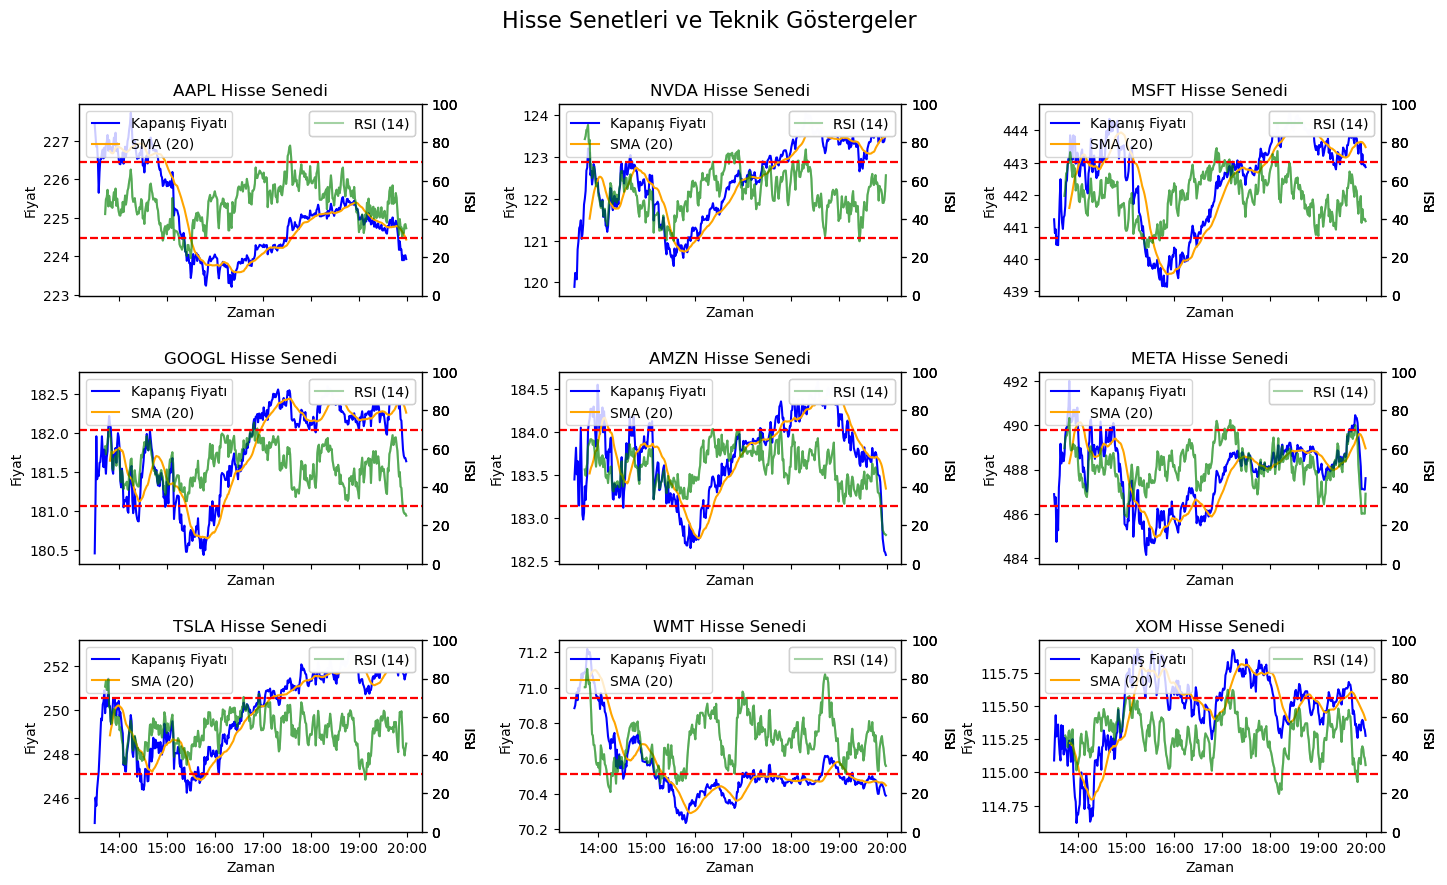

In [4]:
import tkinter as tk
from tkinter import ttk
import yfinance as yf
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.dates as mdates
from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator
from datetime import datetime
from threading import Timer
import matplotlib.pyplot as plt

class StockApp:
    def __init__(self, root):
        # Ana pencereyi alır ve başlığını ayarlar.
        self.root = root
        self.root.title("Hisse Senedi Analiz Panosu")

        # Hisse senedi fiyatı için bir çerçeve oluşturur.
        self.price_frame = tk.Frame(root)
        self.price_frame.pack(pady=10)

        # Son güncelleme zamanını gösterecek bir etiket oluşturur.
        self.update_time_label = tk.Label(self.price_frame, text="", font=("Helvetica", 10))
        self.update_time_label.pack(side=tk.LEFT, padx=10)

        # Grafiği oluşturur.
        self.fig, self.axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
        self.fig.suptitle('Hisse Senetleri ve Teknik Göstergeler', fontsize=16)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        # Grafiği Tkinter penceresine yerleştirir.
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Her hisse senedi için çerçeve oluşturur.
        self.frames = {}
        self.tickers = ["AAPL", "NVDA", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "WMT", "XOM"]
        for i, ticker in enumerate(self.tickers):
            row = i // 3
            col = i % 3
            ax = self.axes[row, col]
            self.frames[ticker] = ax

        # Hisse senedi verilerini günceller.
        self.update_stock_data()

    def update_stock_data(self):
        # Her hisse senedi için verileri çeker ve grafiği günceller.
        for ticker in self.tickers:
            try:
                stock_data = yf.Ticker(ticker).history(period="1d", interval="1m")
                self.plot_stock_data(ticker, stock_data)
            except Exception as e:
                print(f"Error fetching data for {ticker}: {e}")

        # Son güncelleme zamanını gösterir.
        self.update_time_label.config(text=f"Son Güncelleme: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        # Fonksiyonu her 5 saniyede bir çalıştırmak için zamanlayıcıyı başlatır.
        self.timer = Timer(5, self.update_stock_data)
        self.timer.start()

    def plot_stock_data(self, ticker, data):
        if data.empty:
            return

        ax = self.frames[ticker]
        ax.clear()

        # Kapanış fiyatını çizer.
        ax.plot(data.index, data['Close'], label='Kapanış Fiyatı', color='blue')

        # SMA hesaplar ve çizer.
        sma = SMAIndicator(data['Close'], window=20)
        data['SMA'] = sma.sma_indicator()
        ax.plot(data.index, data['SMA'], label='SMA (20)', color='orange')

        # RSI hesaplar ve çizer.
        rsi = RSIIndicator(data['Close'], window=14)
        data['RSI'] = rsi.rsi()
        ax2 = ax.twinx()
        ax2.plot(data.index, data['RSI'], label='RSI (14)', color='green', alpha=0.3)
        ax2.axhline(70, color='red', linestyle='--')
        ax2.axhline(30, color='red', linestyle='--')
        ax2.set_ylim(0, 100)
        ax2.set_ylabel('RSI')

        # Tarihleri x ekseninde formatlar.
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.set_xlabel('Zaman')
        ax.set_ylabel('Fiyat')
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

        ax.set_title(f'{ticker} Hisse Senedi')
        self.canvas.draw()

    def on_close(self):
        # Uygulamayı kapatırken zamanlayıcıyı iptal eder.
        self.timer.cancel()
        self.root.destroy()

if __name__ == "__main__":
    root = tk.Tk()
    app = StockApp(root)
    root.protocol("WM_DELETE_WINDOW", app.on_close)
    root.mainloop()